# Método de Verlet

$$x_{n+1} = 2x_n - x_{n-1} + a(t_n;v_n)\Delta t^2$$
$$v_n = \frac{x_{n+1} - x_{n-1}}{2\Delta t}$$

* Para encontrar $x_n$ usamos o método de Euler Explícito a partir das condições iniciais

## Aplicação: Pêndulo simples

$$\frac{d^2x}{dt^2} = -w^2\sin(x)$$

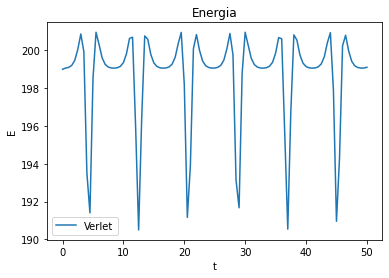

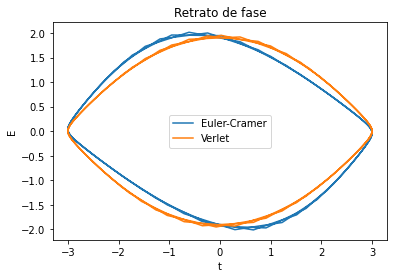

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

# condições inicias

w=1
x_o=3
v_o=0
dt = 0.5
tf = 50
g = 10
m = 1
l = 10

# Primeiro, encontrar x1 utilizando o método de Euler Explicito
x1 = x_o + v_o*dt
t = 0
# Metodo de verlet
t_list = [0]
x_arr = [x_o]
v_arr = [v_o]
E_verlet = [(1/2)*m*l**2*v_o**2 + m*g*l*(1 - np.cos(x_o))]
x = x_o 
while(t < tf):
  x2 = 2*x1 - x_o - (w**2)*np.sin(x1)*dt**2
  v1 = (x2 - x_o)/(2*dt)
  En = (1/2)*m*l**2*v1**2 + m*g*l*(1 - np.cos(x1))
  E_verlet.append(En)
  x_arr.append(x1)
  v_arr.append(v1)
  x_o = x1
  x1 = x2
  t += dt
  t_list.append(t)

# metodo Euler-Cramer
#condições inicias

w=1
x_o=3
v_o=0
dt = 0.5
t_o =0
tf = 50

x = x_o
v = v_o
t = 0
x_eulerCramer = [x_o]
v_eulerCramer = [v_o]
E_cramer = [(1/2)*m*l**2*v**2 + m*g*l*(1 - np.cos(x))]
t_ar = [t_o]
while(t < tf):
  x = x + v*dt
  v = v - w**2*np.sin(x)*dt
  En = (1/2)*m*l**2*v**2 + m*g*l*(1 - np.cos(x))
  x_eulerCramer.append(x)
  v_eulerCramer.append(v)
  E_cramer.append(En)
  t_ar.append(t)
  t += dt
  
plt.figure()
plt.title("Energia")
plt.xlabel("t")
plt.ylabel("E")
#plt.plot(t_ar,E_cramer, label="Euler-Cramer")
plt.plot(t_list,E_verlet, label="Verlet")
plt.legend()
plt.show()
plt.close()

plt.figure()
plt.title("Retrato de fase")
plt.xlabel("t")
plt.ylabel("E")
plt.plot(x_eulerCramer,v_eulerCramer, label="Euler-Cramer")
plt.plot(x_arr,v_arr, label="Verlet")
plt.legend()
plt.show()
plt.close()